In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
X_train=pd.read_excel(r'Data_Train.xlsx')
X_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [59]:
X_train.shape

(10683, 11)

In [60]:
X_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [61]:
X_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [62]:
X_train.dropna(inplace=True)
X_train.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [63]:
y_train=X_train['Price']
X_train.drop('Price',axis=1,inplace=True)
X_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [64]:
X_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [65]:
X_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# EDA

In [66]:
# Converting date of journey to date time since it is in string
X_train['day_of_journey']=pd.to_datetime(X_train['Date_of_Journey'],format='%d/%m/%Y').dt.day
X_train['month_of_journey']=pd.to_datetime(X_train['Date_of_Journey'],format='%d/%m/%Y').dt.month
X_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_journey,month_of_journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,1,3


In [67]:
X_train.drop(['Date_of_Journey'],axis=1,inplace=True)
X_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_journey,month_of_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,1,3


In [68]:
# dep _time
X_train['dep_hour']=pd.to_datetime(X_train['Dep_Time']).dt.hour
X_train['dep_min']=pd.to_datetime(X_train['Dep_Time']).dt.minute
X_train.drop(['Dep_Time'],axis=1,inplace=True)
X_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,day_of_journey,month_of_journey,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,1,3,16,50


In [69]:
#arrival time
X_train['Arrival_Time_hour']=pd.to_datetime(X_train['Arrival_Time']).dt.hour
X_train['Arrival_Time_minutes']=pd.to_datetime(X_train['Arrival_Time']).dt.minute
X_train.drop(['Arrival_Time'],axis=1,inplace=True)
X_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day_of_journey,month_of_journey,dep_hour,dep_min,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,1,3,16,50,21,35


In [70]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(X_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [71]:
X_train.drop(['Duration'],axis=1,inplace=True)
X_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,day_of_journey,month_of_journey,dep_hour,dep_min,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,1,3,16,50,21,35


In [72]:
X_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [73]:
X_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,day_of_journey,month_of_journey,dep_hour,dep_min,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,1,3,16,50,21,35


In [74]:
# Categorical features

Airline=X_train['Airline']
a=pd.get_dummies(Airline,drop_first=True)
a.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [75]:
X_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [76]:
#source
X_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [77]:
Source=X_train['Source']
s=pd.get_dummies(Source,drop_first=True)
s.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [78]:

s.rename(columns={'Delhi':'Delhi_s','Kolkata':'Kolkata_s'},inplace=True)

In [79]:
#destination
X_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [80]:
Dest=X_train['Destination']
d=pd.get_dummies(Dest,drop_first=True)
d.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [81]:
d.rename(columns={'Delhi':'Delhi_d','Kolkata':'Kolkata_d'},inplace=True)

In [82]:
#total-stops
X_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [83]:
X_train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [84]:
X_train.head()
X_train.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [85]:
X_train.head()
X_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [86]:
X_train.head()

,Total_Stops,day_of_journey,month_of_journey,dep_hour,dep_min,Arrival_Time_hour,Arrival_Time_minutes
0,0,24,3,22,20,1,10
1,2,1,5,5,50,13,15
2,2,9,6,9,25,4,25
3,1,12,5,18,5,23,30
4,1,1,3,16,50,21,35


In [87]:
X_train=pd.concat([X_train,a,s,d],axis=1)
X_train.head()

,Total_Stops,day_of_journey,month_of_journey,dep_hour,dep_min,Arrival_Time_hour,Arrival_Time_minutes,Air India,GoAir,IndiGo,...,Vistara Premium economy,Chennai,Delhi_s,Kolkata_s,Mumbai,Cochin,Delhi_d,Hyderabad,Kolkata_d,New Delhi
0,0,24,3,22,20,1,10,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [88]:
X_train.columns

Index(['Total_Stops', 'day_of_journey', 'month_of_journey', 'dep_hour',
       'dep_min', 'Arrival_Time_hour', 'Arrival_Time_minutes', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi_s',
       'Kolkata_s', 'Mumbai', 'Cochin', 'Delhi_d', 'Hyderabad', 'Kolkata_d',
       'New Delhi'],
      dtype='object')

In [89]:
#test data
test_data = pd.read_excel(r"Test_set.xlsx")

In [90]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [91]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)
Source.rename(columns={'Delhi':'Delhi_s','Kolkata':'Kolkata_s'},inplace=True)
print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)
Destination.rename(columns={'Delhi':'Delhi_d','Kolkata':'Kolkata_d'},inplace=True)
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [92]:
data_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi_s', 'Kolkata_s',
       'Mumbai', 'Cochin', 'Delhi_d', 'Hyderabad', 'Kolkata_d', 'New Delhi'],
      dtype='object')

In [93]:
#feature engineering
y_train

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

<AxesSubplot:>

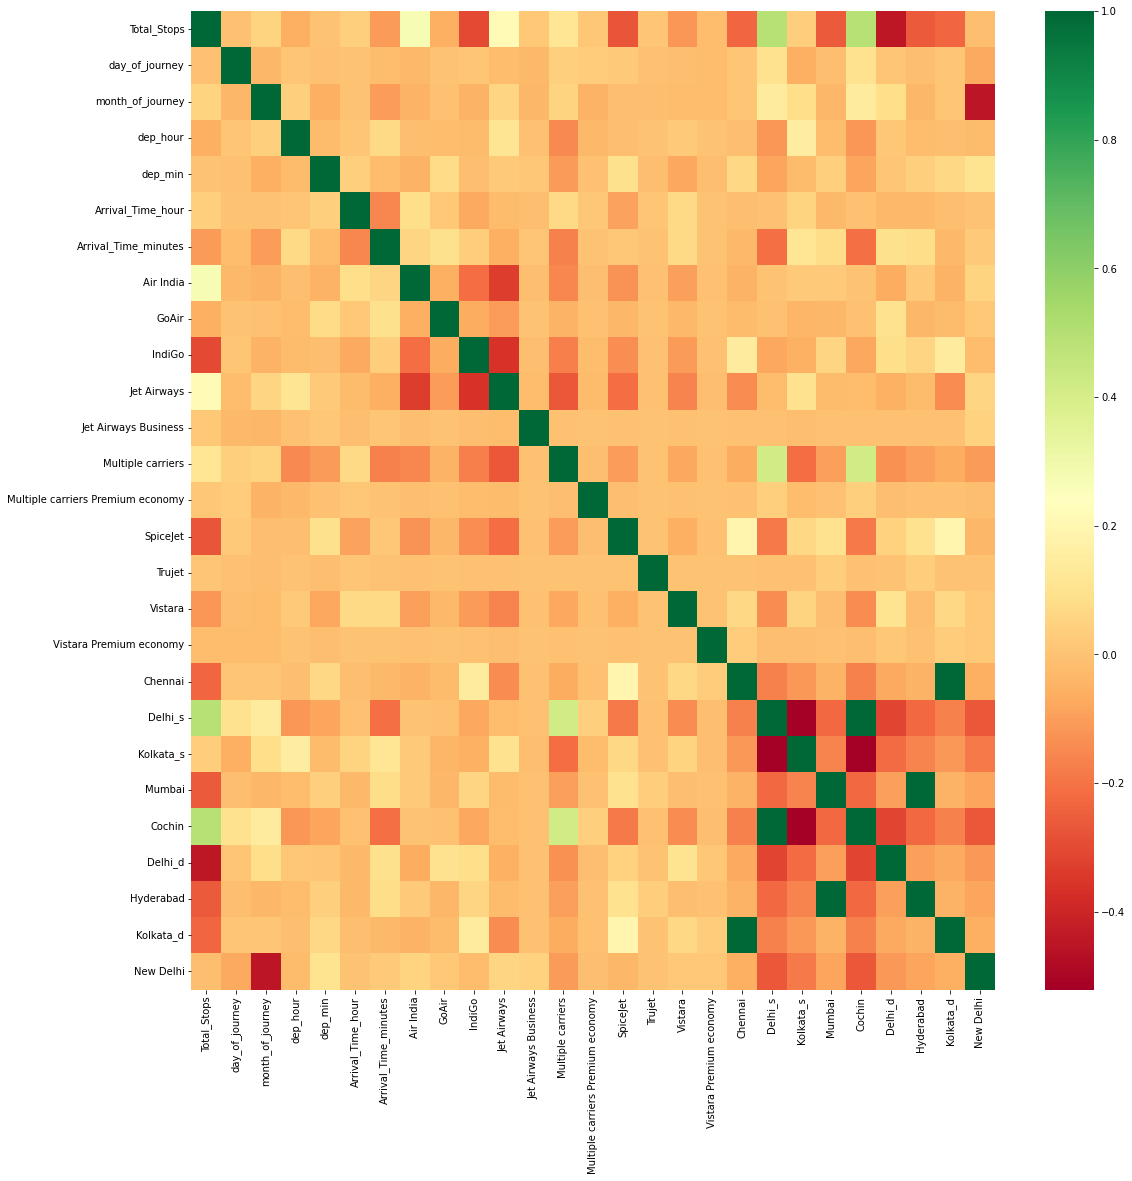

In [94]:
plt.figure(figsize = (18,18))
sns.heatmap(X_train.corr(),cmap = "RdYlGn")

In [95]:
#feature importance using extra tree regressor
from sklearn.ensemble import ExtraTreesRegressor


In [96]:
e=ExtraTreesRegressor()
e.fit(X_train,y_train)

ExtraTreesRegressor()

In [97]:
#Creating the ML model
import xgboost
print(xgboost.__version__)

1.5.0


In [98]:
e.feature_importances_

array([3.03371879e-01, 1.42816165e-01, 5.51767732e-02, 3.95980170e-02,
       3.06480473e-02, 3.76554344e-02, 2.60169521e-02, 1.38632921e-02,
       1.49482831e-03, 1.45561634e-02, 1.47251598e-01, 6.67140550e-02,
       2.02458397e-02, 9.40327025e-04, 3.61802244e-03, 1.53452689e-04,
       6.93239715e-03, 9.47574871e-05, 5.00798172e-04, 1.02317234e-02,
       3.20259251e-03, 8.33066165e-03, 1.32189434e-02, 1.98829446e-02,
       8.51382776e-03, 5.31295878e-04, 2.44392109e-02])

In [99]:
X_train.columns



Index(['Total_Stops', 'day_of_journey', 'month_of_journey', 'dep_hour',
       'dep_min', 'Arrival_Time_hour', 'Arrival_Time_minutes', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi_s',
       'Kolkata_s', 'Mumbai', 'Cochin', 'Delhi_d', 'Hyderabad', 'Kolkata_d',
       'New Delhi'],
      dtype='object')

In [100]:
data_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi_s', 'Kolkata_s',
       'Mumbai', 'Cochin', 'Delhi_d', 'Hyderabad', 'Kolkata_d', 'New Delhi'],
      dtype='object')

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = 0.2 , random_state=40)

In [103]:
from sklearn.model_selection import RandomizedSearchCV

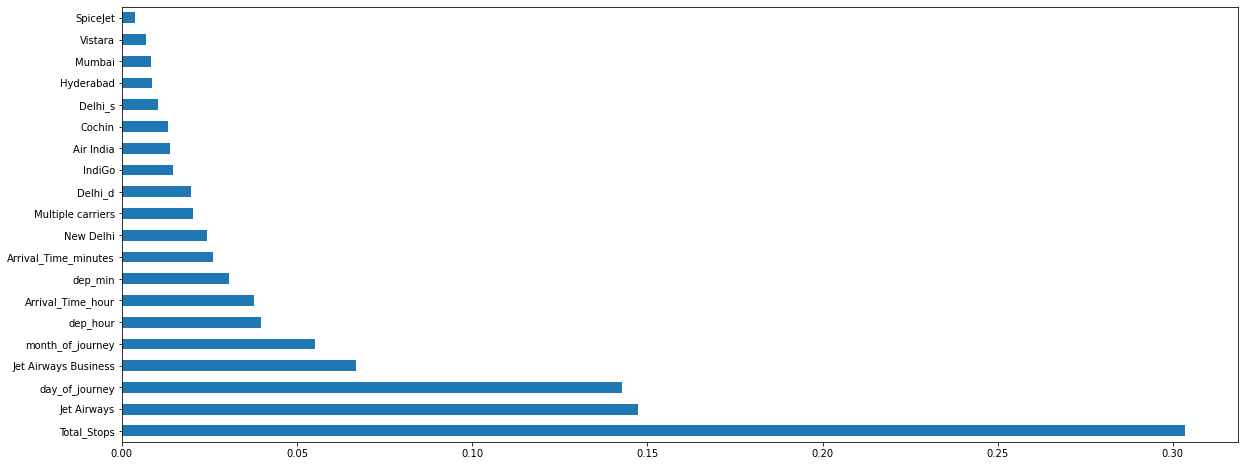

In [104]:
plt.figure(figsize=(20,8))
feature=pd.Series(e.feature_importances_,index=X_train.columns)
feature.nlargest(20).plot(kind='barh')
plt.show()

In [105]:
XGB=xgboost.XGBRegressor()

In [106]:
params={
    'learning_rate':[0.1,0.001,0.01,0.2,0.3,0.4],
    'max_depth':[3,4,5,6,10,15,20],
    'min_child_weight':[3,4,5,6,7,9,13,15],
    'gamma':[0.3,0.4,0.5,0.6,0.9],
    'colsample_bytree':[0.1,0.2,0.4,0.5]
}

In [107]:
randomXGB=RandomizedSearchCV(XGB,param_distributions=params,n_jobs=-1,cv=5,verbose=5,scoring='neg_mean_squared_error',n_iter=5)


In [108]:
randomXGB.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate

In [109]:
randomXGB.best_params_

{'min_child_weight': 5,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [110]:
print(X_train.shape)
print(y_train.shape)

(8545, 27)
(8545,)


In [111]:
X_train.columns


Index(['Total_Stops', 'day_of_journey', 'month_of_journey', 'dep_hour',
       'dep_min', 'Arrival_Time_hour', 'Arrival_Time_minutes', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi_s',
       'Kolkata_s', 'Mumbai', 'Cochin', 'Delhi_d', 'Hyderabad', 'Kolkata_d',
       'New Delhi'],
      dtype='object')

In [112]:
y_train

72      10791
3207     6218
3501    16736
7312     7640
8777     4483
        ...  
7839     3815
3603    18260
5959    12351
5426     3873
7608     2175
Name: Price, Length: 8545, dtype: int64

In [113]:
y_pred = randomXGB.predict(X_test)


C:\Users\sanit.phondke\Anaconda3\envs\flight\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

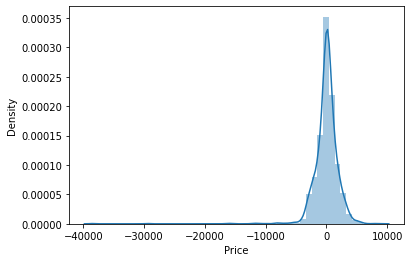

In [114]:
sns.distplot(y_pred - y_test)


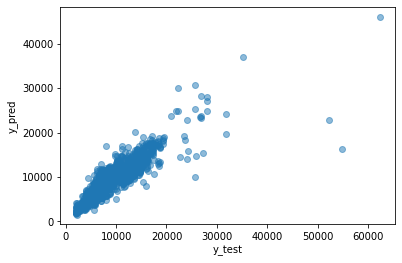

In [115]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [116]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1222.9210100544353
MSE: 4184422.451967034
RMSE: 2045.58609008935


In [117]:
metrics.r2_score(y_test, y_pred)

0.8126129620200272

In [118]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(randomXGB, file)